# To predict diabetes using PIMA diabetes data

### Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

### Load and review data

In [2]:
data = pd.read_csv("pima-data.csv")

In [3]:
data.shape

(768, 10)

In [4]:
data.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [5]:
data.isnull().values.any()

False

In [6]:
def plot_correlated(data, size=11):
    """
    Function to show plot of correlation between the data columns
    data : the data from pandas Dataframe
    size : the horizontal and vertical size of the plot
    
    Result : blue - cyan - yellow - red -darkred = less to more correlated columns = 0 ---- 1 
    """
    corr = data.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

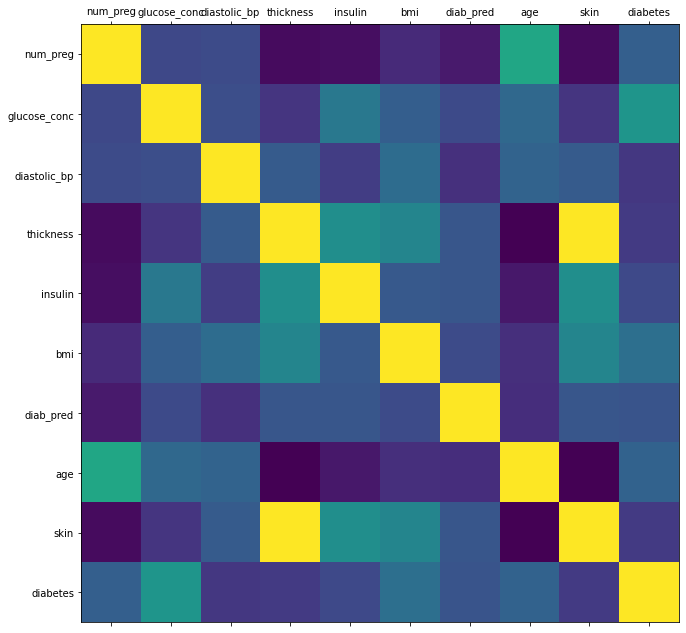

In [7]:
plot_correlated(data)

In [8]:
data.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


In [9]:
del data['thickness']

In [10]:
data.head(5)

,num_preg,glucose_conc,diastolic_bp,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,0,33.6,0.627,50,1.3790,True
1,1,85,66,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,23.3,0.672,32,0.0000,True
3,1,89,66,94,28.1,0.167,21,0.9062,False
4,0,137,40,168,43.1,2.288,33,1.3790,True


### Uniformying the data types of the features

In [12]:
data.head(5)

,num_preg,glucose_conc,diastolic_bp,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,0,33.6,0.627,50,1.3790,True
1,1,85,66,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,23.3,0.672,32,0.0000,True
3,1,89,66,94,28.1,0.167,21,0.9062,False
4,0,137,40,168,43.1,2.288,33,1.3790,True


Changing the diabetes column data from boolean to number

In [13]:
diabetes_map = {True: 1, False: 0}

In [14]:
data['diabetes'] = data['diabetes'].map(diabetes_map)

In [15]:
data.head(5)

,num_preg,glucose_conc,diastolic_bp,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,0,33.6,0.627,50,1.3790,1
1,1,85,66,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,23.3,0.672,32,0.0000,1
3,1,89,66,94,28.1,0.167,21,0.9062,0
4,0,137,40,168,43.1,2.288,33,1.3790,1


In [16]:
diabetes_true_count = len(data.loc[data['diabetes'] == True])

In [17]:
diabetes_false_count = len(data.loc[data['diabetes'] == False])

In [18]:
print("Diabetes - True : ", diabetes_true_count)
print("Diabetes - False : ", diabetes_false_count)

Diabetes - True :  268
Diabetes - False :  500


In [19]:
print("Diabetes - True : ", diabetes_true_count/data.shape[0]*100)
print("Diabetes - False : ", diabetes_false_count/data.shape[0]*100)

Diabetes - True :  34.89583333333333
Diabetes - False :  65.10416666666666


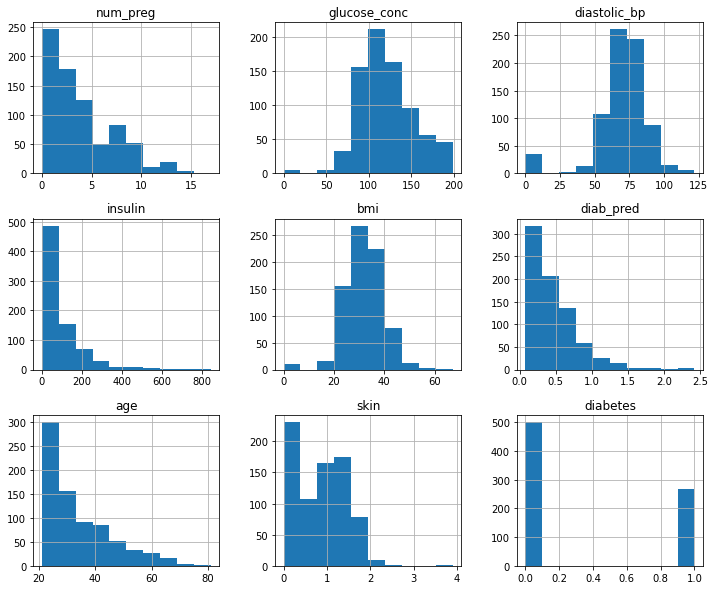

In [22]:
# Histogram for each column
data.hist(figsize=(12, 10))
plt.show()


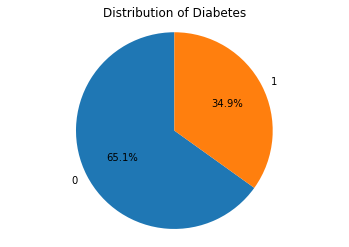

In [23]:
# Pie chart for the 'diabetes' column
diabetes_counts = data['diabetes'].value_counts()
plt.pie(diabetes_counts, labels=diabetes_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Diabetes')
plt.show()


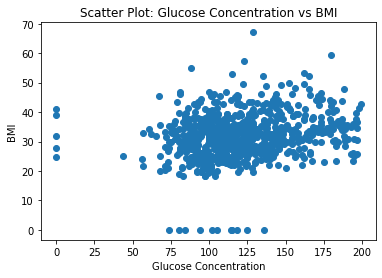

In [24]:
# Scatter plot for 'glucose_conc' and 'bmi' columns
plt.scatter(data['glucose_conc'], data['bmi'])
plt.xlabel('Glucose Concentration')
plt.ylabel('BMI')
plt.title('Scatter Plot: Glucose Concentration vs BMI')
plt.show()


# Box plot for 'age' column


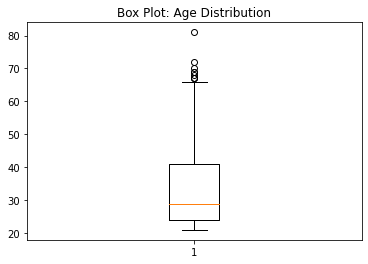

In [25]:
# Box plot for 'age' column
plt.boxplot(data['age'])
plt.title('Box Plot: Age Distribution')
plt.show()


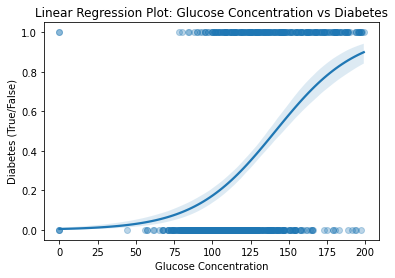

In [29]:


# Linear regression plot for 'glucose_conc' and 'diabetes'
sns.regplot(x='glucose_conc', y='diabetes', data=data, logistic=True, scatter_kws={'alpha':0.3})
plt.title('Linear Regression Plot: Glucose Concentration vs Diabetes')
plt.xlabel('Glucose Concentration')
plt.ylabel('Diabetes (True/False)')
plt.show()


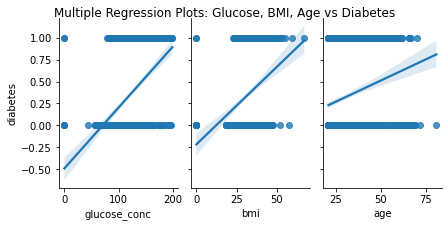

In [30]:
# Multiple regression plot using seaborn pairplot
sns.pairplot(data, x_vars=['glucose_conc', 'bmi', 'age'], y_vars='diabetes', kind='reg', aspect=0.7, height=3)
plt.suptitle('Multiple Regression Plots: Glucose, BMI, Age vs Diabetes', y=1.02)
plt.show()


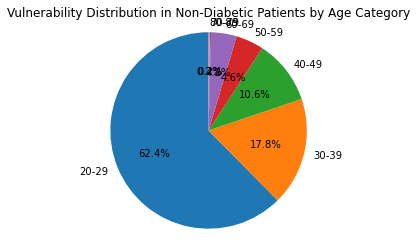

In [33]:
# Assuming you want to consider age as a factor for vulnerability in non-diabetic patients
non_diabetic_data = data[data['diabetes'] == False].copy()  # Use .copy() to avoid the SettingWithCopyWarning

# Define age categories based on your criteria
bins = [20, 30, 40, 50, 60, 70, 80, 90]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89']
non_diabetic_data.loc[:, 'age_category'] = pd.cut(non_diabetic_data['age'], bins=bins, labels=labels, right=False)

# Pie chart for vulnerability in non-diabetic patients based on age
age_counts = non_diabetic_data['age_category'].value_counts()

plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Vulnerability Distribution in Non-Diabetic Patients by Age Category')
plt.show()


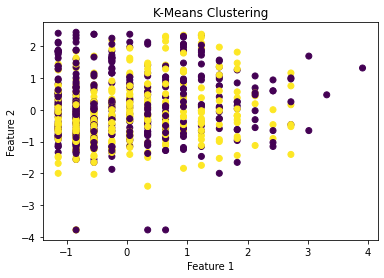

In [39]:
# Importing necessary libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



# Drop the 'diabetes' column for clustering
X = data.drop('diabetes', axis=1)

# Standardize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
data['cluster'] = kmeans.fit_predict(X_std)

# Visualize the clusters
plt.scatter(X_std[:, 0], X_std[:, 1], c=data['cluster'], cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()



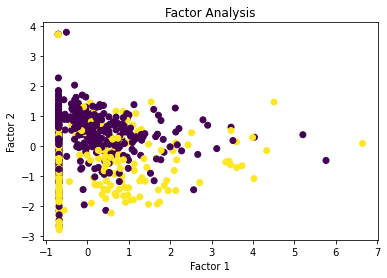

In [40]:
# Importing necessary libraries
from sklearn.decomposition import FactorAnalysis

# Drop the 'diabetes' column for factor analysis
X_factor = data.drop('diabetes', axis=1)

# Apply Factor Analysis
fa = FactorAnalysis(n_components=2)
data[['Factor1', 'Factor2']] = fa.fit_transform(X_factor)

# Visualize the factors
plt.scatter(data['Factor1'], data['Factor2'], c=data['diabetes'], cmap='viridis')
plt.title('Factor Analysis')
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.show()
